# CLEANING DATA FILE

### In this file "Cleaning_data," there will be an exploration of the data, a decision will be made whether to remove columns that are not useful for the analysis, duplicates and null values will be removed, tables will be merged, and new columns will be created with the goal of being used later in the analysis.

# IMPORTS

In [ ]:
import pandas as pd
import os
import numpy as np

### Code block to load the data that will be used.

In [ ]:
path = "./data/Laboratory/"
df_glycoprotein = pd.read_csv(f"{path}AGP_L.csv")
df_HDL= pd.read_csv(f"{path}HDL_L.csv")
df_cholesterol_total = pd.read_csv(f"{path}TCHOL_L.csv")
df_glycohemoglobin = pd.read_csv(f"{path}GHB_L.csv")
df_reactin_protein = pd.read_csv(f"{path}HSCRP_L.csv")
df_insulin = pd.read_csv(f"{path}INS_L.csv")
df_glucose = pd.read_csv(f"{path}GLU_L.csv")
df_demographic = pd.read_csv("./Demographics/DEMO_L.csv")
df_smoking_use = pd.read_csv('data/Questions/SMQ_L.csv')
df_smoking_recent_use = pd.read_csv('data/Questions/SMQRTU_L.csv')
df_w_pandemic = pd.read_csv("data/Questions/Historic/P_WHQMEC.csv")
df_w_2001 = pd.read_csv("data/Questions/Historic/WHQ_2001_B.csv")
df_w_2003 = pd.read_csv("data/Questions/Historic/WHQ_2003_C.csv")
df_w_2005 = pd.read_csv("data/Questions/Historic/WHQ_2005_D.csv")
df_w_2007 = pd.read_csv("data/Questions/Historic/WHQ_2007_E.csv")
df_w_2009 = pd.read_csv("data/Questions/Historic/WHQ_2009_F.csv")
df_w_2011 = pd.read_csv("data/Questions/Historic/WHQ_2011_G.csv")
df_w_2013 = pd.read_csv("data/Questions/Historic/WHQ_2013_H.csv")
df_w_2015 = pd.read_csv("data/Questions/Historic/WHQ_2015_I.csv")
df_w_2017 = pd.read_csv("data/Questions/Historic/WHQ_2017_J.csv")
df_w_2023 = pd.read_csv("data/Questions/WHQ_L.csv")

# LABORATORY DATA

### Glycoprotein data

<class 'pandas.core.frame.DataFrame'>
Index: 1950 entries, 0 to 2563
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEQN                            1950 non-null   float64
 1   alpha-1-acid_glycoprotein(g/L)  1950 non-null   float64
dtypes: float64(2)
memory usage: 45.7 KB
             
Número de filas:1950
             


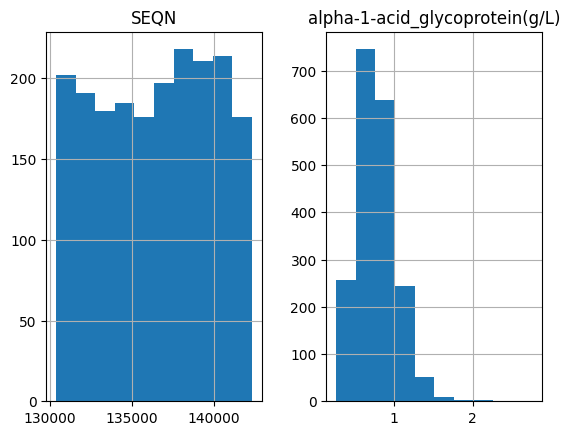

In [ ]:
# Borro las filas de las que no haya datos de glicoproteína porque no me valen para nada luego para compararlos al peso posterior:
df_glycoprotein = df_glycoprotein.dropna()
# Si hay un 0 en la columna WTPH2YR significa que el paciente no entrego la muestra de sangre
df_glycoprotein = df_glycoprotein[df_glycoprotein['WTPH2YR'] != 0]
df_glycoprotein = df_glycoprotein.drop(['WTPH2YR'], axis=1)
df_glycoprotein.rename(columns={'LBXAGP': 'alpha-1-acid_glycoprotein(g/L)'}, inplace=True)
df_glycoprotein.info()
print("             ")
# Compruebo que no haya duplicados
print(f"Número de filas:{df_glycoprotein.SEQN.nunique()}")
print("             ")
# Distribución de los datos
df_glycoprotein.hist();
df_glycoprotein.to_csv("./data/Data_processed/df_glycoprotein_clean.csv", index=False)

### Cholesterol data HDL

<class 'pandas.core.frame.DataFrame'>
Index: 6890 entries, 0 to 8067
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SEQN                     6890 non-null   float64
 1   HDL-Cholesterol(mmol/L)  6890 non-null   float64
dtypes: float64(2)
memory usage: 161.5 KB
                     
Número de filas:6890
                     


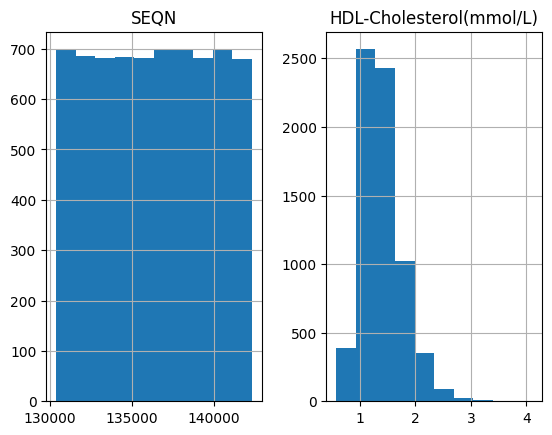

In [ ]:
# Borro las filas de las que no haya datos de colesterol porque no me valen para nada luego para compararlos al peso posterior:
df_HDL = df_HDL.dropna()
# Borro la columna de nivel de colesterol pero que no estan las unidades en el sistema internacional
df_HDL = df_HDL.drop(['LBDHDD','WTPH2YR'], axis=1)
df_HDL.rename(columns={'LBDHDDSI': 'HDL-Cholesterol(mmol/L)'}, inplace=True)
# Miro duplicados
df_HDL.info()
print("                     ")
print(f"Número de filas:{df_HDL.SEQN.nunique()}")
# Distribución de los datos
print("                     ")
df_HDL.hist();
df_HDL.to_csv("./data/Data_processed/df_HDL_clean.csv", index=False)


### CHolesterol data Total cholesterol

<class 'pandas.core.frame.DataFrame'>
Index: 6890 entries, 0 to 8067
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SEQN                       6890 non-null   float64
 1   Total_Cholesterol(mmol/L)  6890 non-null   float64
dtypes: float64(2)
memory usage: 161.5 KB
                     
Número de filas:6890
                     


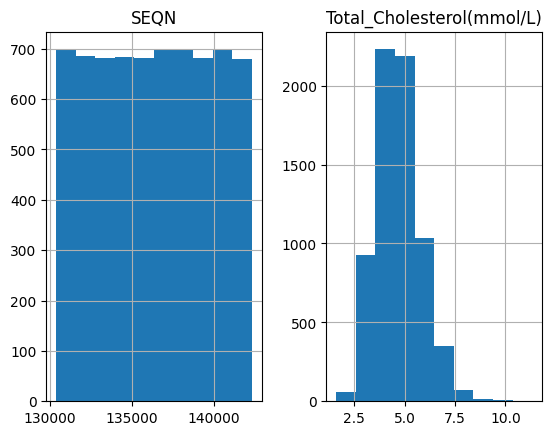

In [ ]:
# Borro las filas de las que no haya datos de colesterol porque no me valen para nada luego para compararlos al peso posterior:
df_cholesterol_total = df_cholesterol_total.dropna()
# Si hay un 0 en la columna WTPH2YR significa que el paciente no entrego la muestra de sangre
df_cholesterol_total = df_cholesterol_total[df_cholesterol_total['WTPH2YR'] != 0]
# Borro la columna de nivel de colesterol pero que no estan las unidades en el sistema internacional
df_cholesterol_total = df_cholesterol_total.drop(['WTPH2YR','LBXTC'], axis=1)
df_cholesterol_total.rename(columns={'LBDTCSI': 'Total_Cholesterol(mmol/L)'}, inplace=True)
# Miro duplicados
df_cholesterol_total.info()
print("                     ")
print(f"Número de filas:{df_cholesterol_total.SEQN.nunique()}")
# Distribución de los datos
print("                     ")
df_cholesterol_total.hist();
df_cholesterol_total.to_csv("./data/Data_processed/df_cholesterol_clean.csv", index=False)

### CHOLESTEROL TOTAL

In [ ]:
df_cholesterol_final= pd.merge(df_cholesterol_total, df_HDL, on="SEQN", how="inner")
df_cholesterol_final.info()
df_cholesterol_final["Cholesterol_index"] = df_cholesterol_final["Total_Cholesterol(mmol/L)"] / df_cholesterol_final["HDL-Cholesterol(mmol/L)"]
df_cholesterol_final
df_cholesterol_obesidad = pd.merge(df_cholesterol_final, df_w_2023, on="SEQN", how="inner")
df_cholesterol_obesidad.info()
df_cholesterol_obesidad.IMC_category.unique()
df_cholesterol_obesidad.to_csv("./data/Data_processed/df_cholesterol_imc_clean.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6890 entries, 0 to 6889
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SEQN                       6890 non-null   float64
 1   Total_Cholesterol(mmol/L)  6890 non-null   float64
 2   HDL-Cholesterol(mmol/L)    6890 non-null   float64
dtypes: float64(3)
memory usage: 161.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5946 entries, 0 to 5945
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SEQN                       5946 non-null   float64
 1   Total_Cholesterol(mmol/L)  5946 non-null   float64
 2   HDL-Cholesterol(mmol/L)    5946 non-null   float64
 3   Cholesterol_index          5946 non-null   float64
 4   Height(m)                  5946 non-null   float64
 5   Weight(Kg)                 5946 non-null   float64
 6   Weight(year_

### Reactin protein data

<class 'pandas.core.frame.DataFrame'>
Index: 7096 entries, 0 to 8726
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      7096 non-null   float64
 1   C-Reactive Protein(mg/L)  7096 non-null   float64
dtypes: float64(2)
memory usage: 166.3 KB
                     
Número de filas:7096
                     


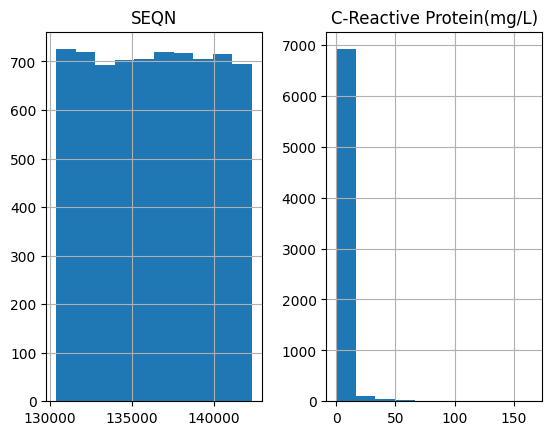

In [ ]:
# # Borro las filas de las que no haya datos de colesterol porque no me valen para nada luego para compararlos al peso posterior:
df_reactin_protein = df_reactin_protein.dropna()
# Si hay un 0 en la columna WTPH2YR significa que el paciente no entrego la muestra de sangre
df_reactin_protein = df_reactin_protein[df_reactin_protein['WTPH2YR'] != 0]
df_reactin_protein = df_reactin_protein[df_reactin_protein['LBDHRPLC'] != 1]
df_reactin_protein.drop(['WTPH2YR','LBDHRPLC'],axis=1,inplace=True)
# Miro duplicados
df_reactin_protein.rename(columns={'LBXHSCRP': 'C-Reactive Protein(mg/L)'}, inplace=True)
# Miro duplicados
df_reactin_protein.info()
print("                     ")
print(f"Número de filas:{df_reactin_protein.SEQN.nunique()}")
# Distribución de los datos
print("                     ")
df_reactin_protein.hist();
df_reactin_protein.to_csv("./data/Data_processed/df_reactin_protein_clean.csv", index=False)

### Glucose data

<class 'pandas.core.frame.DataFrame'>
Index: 3672 entries, 0 to 3995
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      3672 non-null   float64
 1   Fasting_Glucose(mmol/L))  3672 non-null   float64
dtypes: float64(2)
memory usage: 86.1 KB
                     
Número de filas:3672
                     


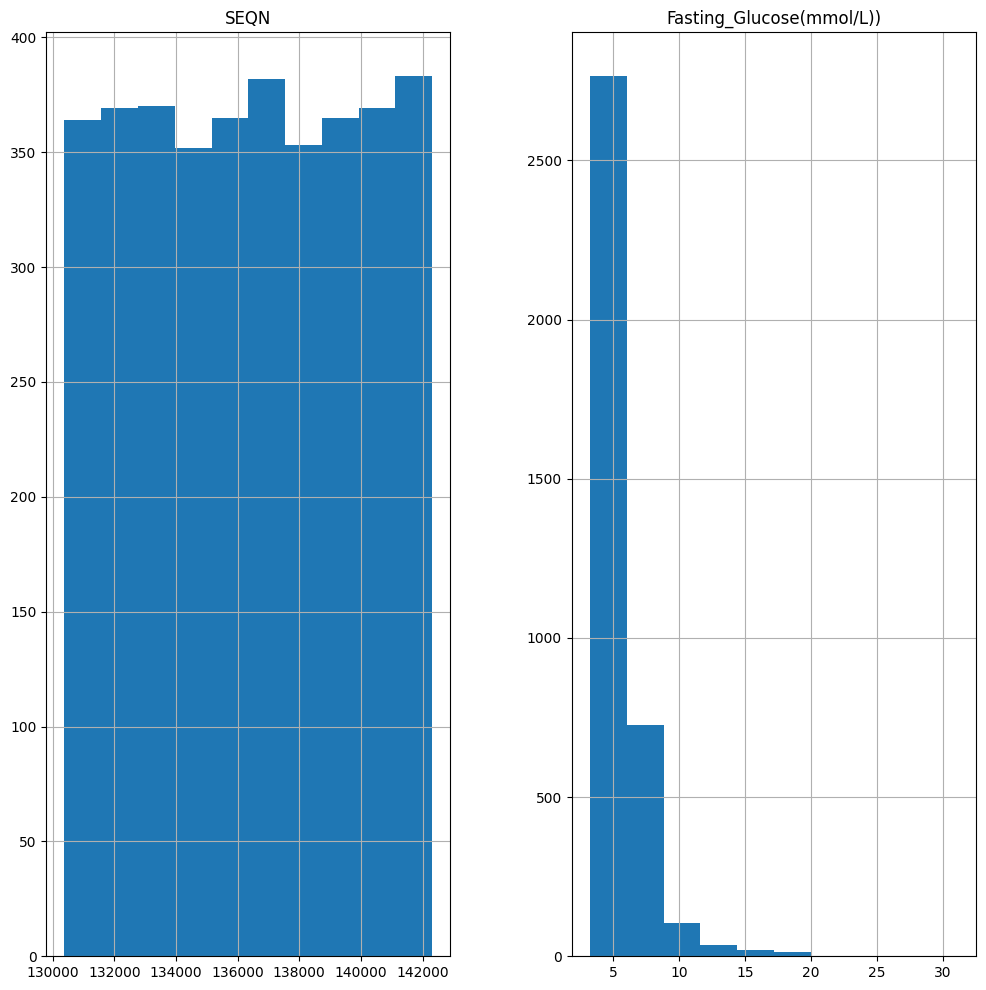

In [ ]:
# # Borro las filas de las que no haya datos de colesterol porque no me valen para nada luego para compararlos al peso posterior:
df_glucose = df_glucose.dropna()
# Si hay un 0 en la columna WTPH2YR significa que el paciente no entrego la muestra de sangre
df_glucose = df_glucose[df_glucose['WTSAF2YR'] != 0]
#Borro las columnas que esten en ng/ml porque en nmol/L es mas estandarizado su uso   
df_glucose = df_glucose.drop(['LBXGLU','WTSAF2YR'], axis=1)
df_glucose.rename(columns={'LBDGLUSI': 'Fasting_Glucose(mmol/L))'}, inplace=True)
#Miro duplicados
df_glucose.info()
print("                     ")
print(f"Número de filas:{df_glucose.SEQN.nunique()}")
# Distribución de los datos
print("                     ")
df_glucose.hist(figsize=(12,12));
df_glucose.to_csv("./data/Data_processed/df_glucose_clean.csv", index=False)

### Insulin data

<class 'pandas.core.frame.DataFrame'>
Index: 3509 entries, 0 to 3995
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEQN             3509 non-null   float64
 1   Insulin(pmol/L)  3509 non-null   float64
dtypes: float64(2)
memory usage: 82.2 KB
                     
Número de filas:3509
                     


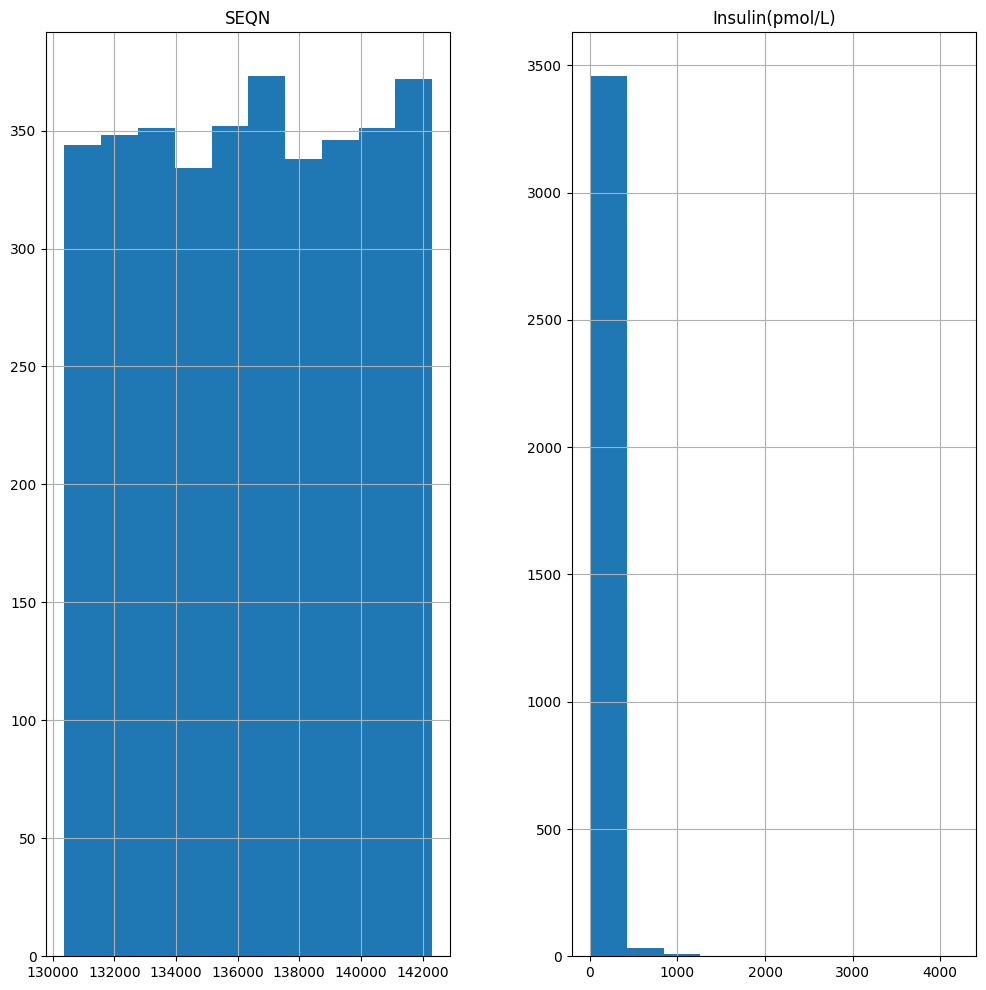

In [ ]:
# # Borro las filas de las que no haya datos de colesterol porque no me valen para nada luego para compararlos al peso posterior:
df_insulin = df_insulin.dropna()
# Si hay un 0 en la columna WTPH2YR significa que el paciente no entrego la muestra de sangre
df_insulin = df_insulin[df_insulin['WTSAF2YR'] != 0]
df_insulin = df_insulin[df_insulin['LBDINLC'] != 1] # Si es igual a 1 la deteccion fue por debajo del límite
#Borro las columnas que esten en ng/ml porque en nmol/L es mas estandarizado su uso 
df_insulin = df_insulin.drop(['WTSAF2YR','LBDINLC','LBXIN'], axis=1)
df_insulin.rename(columns={'LBDINSI': 'Insulin(pmol/L)'}, inplace=True)
# #Miro duplicados
df_insulin.info()
print("                     ")
print(f"Número de filas:{df_insulin.SEQN.nunique()}")
# Distribución de los datos
print("                     ")
df_insulin.hist(figsize=(12,12));
df_insulin.to_csv("./data/Data_processed/df_insulin_clean.csv", index=False) 

### Glycohemoglobin data

<class 'pandas.core.frame.DataFrame'>
Index: 6715 entries, 0 to 7198
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SEQN                6715 non-null   float64
 1   Glycohemoglobin(%)  6715 non-null   float64
dtypes: float64(2)
memory usage: 157.4 KB
                     
Número de filas:6715
                     


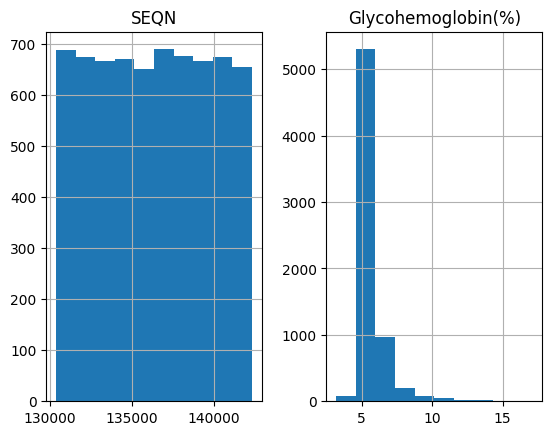

In [ ]:
# # Borro las filas de las que no haya datos de colesterol porque no me valen para nada luego para compararlos al peso posterior:
df_glycohemoglobin = df_glycohemoglobin.dropna()
# Si hay un 0 en la columna WTPH2YR significa que el paciente no entrego la muestra de sangre
df_glycohemoglobin = df_glycohemoglobin[df_glycohemoglobin['WTPH2YR'] != 0]
df_glycohemoglobin.drop(['WTPH2YR'],axis=1,inplace=True)
# Miro duplicados
df_glycohemoglobin.rename(columns={'LBXGH': 'Glycohemoglobin(%)'}, inplace=True)
df_glycohemoglobin.info()
print("                     ")
print(f"Número de filas:{df_glycohemoglobin.SEQN.nunique()}")
# Distribución de los datos
print("                     ")
df_glycohemoglobin.hist();
df_glycohemoglobin.to_csv("./data/Data_processed/df_glycohemoglobin_clean.csv", index=False)

# DIABETES

In [ ]:
df_temp = pd.merge(df_insulin, df_glucose, on="SEQN", how="inner")
df_diabetes = pd.merge(df_temp, df_glycohemoglobin, on="SEQN", how="inner")
df_diabetes_pob = pd.merge(df_w_2023, df_diabetes, on="SEQN", how="inner")
df_diabetes_pob.info()
df_diabetes_pob.to_csv("./data/Data_processed/df_diabetes_clean.csv", index=False)

# DEMOGRAPHIC DATA

In [ ]:
# Remove the columns that are not relevant for the analysis and those that have null values.**
df_demographic.drop(["SDDSRVYR","RIDSTATR","RIDAGEMN","RIDEXMON","WTINT2YR","WTMEC2YR","SDMVSTRA","SDMVPSU","RIDRETH1","RIDAGEMN","RIDEXAGM",
"DMDHRAGZ","DMDHRGND","DMDHREDZ","DMDHRMAZ","DMDHSEDZ"],axis=1,inplace=True) 


In [ ]:
# Rename the columns to more readable and understandable names.
df_demographic.rename(columns={'RIAGENDR': 'Gender',
                    'RIDAGEYR': 'Age(year)',
                    'RIDRETH3':'Race',
                    'DMQMILIZ':'Served_army',
                    'DMDBORN4':'Country_of_birth',
                    'DMDYRUSR':'Length_time_US',
                    'DMDEDUC2':'Education(adults)',
                    'DMDMARTZ':'Marital_status',
                    'RIDEXPRG':'Pregnancy_status',
                    'DMDHHSIZ':'People_in_Household',
                    'INDFMPIR':'Income_poverty_num'}, inplace=True)

df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SEQN                 11933 non-null  float64
 1   Gender               11933 non-null  float64
 2   Age(year)            11933 non-null  float64
 3   Race                 11933 non-null  float64
 4   Served_army          8301 non-null   float64
 5   Country_of_birth     11914 non-null  float64
 6   Length_time_US       1875 non-null   float64
 7   Education(adults)    7794 non-null   float64
 8   Marital_status       7792 non-null   float64
 9   Pregnancy_status     1503 non-null   float64
 10  People_in_Household  11933 non-null  float64
 11  Income_poverty_num   9892 non-null   float64
dtypes: float64(12)
memory usage: 1.1 MB


In [ ]:
# Replace the numbers with the actual data in string format.

df_demographic['Gender'] = df_demographic['Gender'].replace({1: 'Male', 2: 'Female'})

df_demographic['Race'] = df_demographic['Race'].replace({1: 'Mexican American', 2: 'Other Hispanic',
                                                           3:'Non-Hispanic White',4:'Non-Hispanic Black',
                                                           6:'Non-Hispanic Asian',7:'Other Race'})

df_demographic['Served_army'] = df_demographic['Served_army'].replace({1: 'Yes', 2: 'No',
                                                           7:'Refused',9:'Dont know'})

df_demographic['Country_of_birth'] = df_demographic['Country_of_birth'].replace({1: 'US', 2: 'Others',
                                                           77:'Refused',99:'Dont know'})

df_demographic['Length_time_US'] = df_demographic['Length_time_US'].replace({1: '< 1', 2: '1-4',
                                                           3:'5-9',4:'10-14',
                                                           5:'15-19',6:'>20',
                                                           77:'Refuse',99:'Dont Know'})

df_demographic['Education(adults)'] = df_demographic['Education(adults)'].replace({1: '< 9th grade', 2: '9-11th grade',
                                                           3:'High school',4:'Some college',
                                                           5:'College graduate',
                                                           7:'Refuse',9:'Dont Know'})

df_demographic['Marital_status'] = df_demographic['Marital_status'].replace({1: 'Married/Living with partner', 2: 'Widowed/Divorced/Separated',
                                                           3:'Never married',
                                                           77:'Refuse',99:'Dont Know'})

df_demographic['Pregnancy_status'] = df_demographic['Pregnancy_status'].replace({1: 'Yes', 2: 'No',
                                                           3:'Cannot ascertain',})



In [ ]:
# Define a new column that classifies income poverty into categories.

def classify_income(row):
    if row < 2.0:
        return 'Low'
    elif 2.0 <= row < 5.0:
        return 'Middle'
    else:
        return 'High'


df_demographic['Income_poverty'] = df_demographic['Income_poverty_num'].apply(classify_income)


In [ ]:
# Define a new column that simplifies the Race column.
def simplify_races(row):
    if row == 'Mexican American' or row == 'Other Hispanic' \
        or row == 'Non-Hispanic Black' or row == 'Non-Hispanic Asian'\
            or row =='Other Race':
        return 'Back-Hispanic-Asian'
    else:
        return 'White'

df_demographic['Races_simplify'] = df_demographic['Race'].apply(simplify_races)

In [ ]:
# Save the data
df_demographic.to_csv("./data/Data_processed/df_demographic_clean.csv", index=False)

# SMOKING

In [ ]:
# Remove the columns that are not relevant for the analysis and those that have null values.
df_smoking_use.drop(["SMD641","SMD100MN","SMQ621","SMD630","SMAQUEX2"],axis=1,inplace=True)

In [ ]:
# Rename the columns to more readable and understandable names.
df_smoking_use.rename(columns={'SMQ020': '100_cigarettes_life',
                    'SMQ040': 'now_smoke_cigarettes?',
                    'SMD650':'cigarettes_past_30_days'}, inplace=True)

df_smoking_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9015 entries, 0 to 9014
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SEQN                     9015 non-null   float64
 1   100_cigarettes_life      8135 non-null   float64
 2   now_smoke_cigarettes?    3243 non-null   float64
 3   cigarettes_past_30_days  1185 non-null   float64
dtypes: float64(4)
memory usage: 281.8 KB


In [ ]:
# Remove the columns that are not relevant for the analysis and those that have null values.
df_smoking_recent_use.drop(["SMQ690A","SMQ710","SMQ690B","SMQ740","SMQ690C","SMQ770","SMQ690G","SMQ845",
                     "SMQ846","SMQ849","SMQ851","SMQ690D","SMQ690E","SMQ690K","SMQ863","SMQ690F"],axis=1,inplace=True)

df_smoking_recent_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7199 entries, 0 to 7198
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    7199 non-null   float64
 1   SMQ681  6268 non-null   float64
 2   SMQ720  788 non-null    float64
 3   SMQ725  784 non-null    float64
 4   SMDANY  6252 non-null   float64
dtypes: float64(5)
memory usage: 281.3 KB


In [ ]:
# Rename the columns to more readable and understandable names.
df_smoking_recent_use.rename(columns={'SMQ681':'tobacco_5_days',
                    'SMQ720':'cigarettes_smoked_per_day',
                    'SMQ725':'last_cigarette',
                    'SMDANY':'tobacco_product_5_days?'}, inplace=True)

df_smoking_recent_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7199 entries, 0 to 7198
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SEQN                       7199 non-null   float64
 1   tobacco_5_days             6268 non-null   float64
 2   cigarettes_smoked_per_day  788 non-null    float64
 3   last_cigarette             784 non-null    float64
 4   tobacco_product_5_days?    6252 non-null   float64
dtypes: float64(5)
memory usage: 281.3 KB


In [ ]:
# Merge both dataframes to create a single smoking dataframe.
df_smoking = pd.merge(df_smoking_use,df_smoking_recent_use,how='inner',on="SEQN")
df_smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7199 entries, 0 to 7198
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SEQN                       7199 non-null   float64
 1   100_cigarettes_life        6335 non-null   float64
 2   now_smoke_cigarettes?      2518 non-null   float64
 3   cigarettes_past_30_days    922 non-null    float64
 4   tobacco_5_days             6268 non-null   float64
 5   cigarettes_smoked_per_day  788 non-null    float64
 6   last_cigarette             784 non-null    float64
 7   tobacco_product_5_days?    6252 non-null   float64
dtypes: float64(8)
memory usage: 450.1 KB


In [ ]:
# Replace the numbers with the actual data in string format.
df_smoking['100_cigarettes_life'] = df_smoking['100_cigarettes_life'].replace({1: 'Yes', 2: 'No',7:'Refused',9:'Dont know'})
df_smoking['now_smoke_cigarettes?'] = df_smoking['now_smoke_cigarettes?'].replace({1: 'Every day', 2: 'Some days',3:'Not at all',7:'Refused', 9:'Dont know'})
df_smoking['cigarettes_past_30_days'] = df_smoking['cigarettes_past_30_days'].replace({ 777:'Refused',999:'Dont know'})
df_smoking['tobacco_5_days'] = df_smoking['tobacco_5_days'].replace({1: 'Yes', 2: 'No',7:'Refused',9:'Dont know'})
df_smoking['cigarettes_smoked_per_day'] = df_smoking['cigarettes_smoked_per_day'].replace({777:'Refuse',999:'Dont Know'})
df_smoking['last_cigarette'] = df_smoking['last_cigarette'].replace({1: 'Today', 2: 'Yesterday',3:'3 to 5 days ago',7:'Refuse',9:'Dont Know'})
df_smoking['tobacco_product_5_days?'] = df_smoking['tobacco_product_5_days?'].replace({1: 'Yes', 2: 'No', 7:'Refuse',9:'Dont Know'})
# Save the data
df_smoking.to_csv("./data/Data_processed/df_smoking_clean.csv", index=False)

# WEIGHT HISTORIC

In [ ]:
def clean_weight(df):
    columns = ['SEQN', 'WHD010', 'WHD020', 'WHD050', 'WHQ070']
    df = df[columns]

    # Drop rows with missing values (NaN)
    df = df.dropna()

    # Rename columns for better clarity
    df.rename(columns={'WHD010': 'Height(m)', 
                       'WHD020': 'Weight(Kg)', 
                       'WHD050': 'Weight(year_ago)', 
                       'WHQ070': 'Try_to_loss_weight'}, inplace=True)

    # Convert weight (kg) and weight from a year ago (kg) to pounds
    df['Weight(Kg)'] = df['Weight(Kg)'] * 0.453592
    df['Weight(year_ago)'] = df['Weight(year_ago)'] * 0.453592
    
    # Convert height (inches) to meters
    df['Height(m)'] = df['Height(m)'] * 0.0254
    
    # Calculate (IMC) using the formula: weight (kg) / height (m)^2
    df['IMC'] = np.round(df['Weight(Kg)'] / (df['Height(m)'] ** 2), 1)

    # Initialize a new column 'IMC_category' with a default value of "Null"
    df['IMC_category'] = "Null"

    # Categorize (IMC) into different weight categories
    df.loc[df['IMC'] < 18.5, 'IMC_category'] = "Low weight"
    df.loc[(df['IMC'] >= 18.5) & (df['IMC'] <= 24.9), 'IMC_category'] = "Normal weight"
    df.loc[(df['IMC'] >= 25) & (df['IMC'] <= 29.9), 'IMC_category'] = "Overweight"
    df.loc[(df['IMC'] >= 30), 'IMC_category'] = "Obesity"

    return df


In [ ]:

required_columns = ['WHD010', 'WHD020', 'WHD050', 'WHQ070']

# Loop to check if the columns are in all the DataFrames in the list.
for i, df in enumerate(list_dataframes):
    missing_columns = [col for col in required_columns if col not in df.columns]
    
    if missing_columns:
        print(f"DataFrame {i} is missing columns: {missing_columns}")
    else:print(f"DataFrame {i} has all the required columns.")

DataFrame 0 has all the required columns.
DataFrame 1 has all the required columns.
DataFrame 2 has all the required columns.
DataFrame 3 has all the required columns.
DataFrame 4 has all the required columns.
DataFrame 5 has all the required columns.
DataFrame 6 has all the required columns.
DataFrame 7 has all the required columns.
DataFrame 8 has all the required columns.
DataFrame 9 has all the required columns.
DataFrame 10 has all the required columns.


In [ ]:
# Apply function in all dataframes
df_w_pandemic = clean_weight(df_w_pandemic)
df_w_2001 =clean_weight(df_w_2001)
df_w_2003 = clean_weight(df_w_2003)
df_w_2005 = clean_weight(df_w_2005)
df_w_2007 = clean_weight(df_w_2007)
df_w_2009 = clean_weight(df_w_2009)
df_w_2011 = clean_weight(df_w_2011)
df_w_2013 = clean_weight(df_w_2013)
df_w_2015 = clean_weight(df_w_2015)
df_w_2017 = clean_weight(df_w_2017)
df_w_2023 = clean_weight(df_w_2023)
# Save data
df_w_pandemic.to_csv("./data/Data_processed/df_w_pandemic.csv", index=False)
df_w_2001.to_csv("./data/Data_processed/df_w_2001.csv", index=False)
df_w_2003.to_csv("./data/Data_processed/df_w_2003.csv", index=False)
df_w_2005.to_csv("./data/Data_processed/df_w_2005.csv", index=False)
df_w_2007.to_csv("./data/Data_processed/df_w_2007.csv", index=False)
df_w_2009.to_csv("./data/Data_processed/df_w_2009.csv", index=False)
df_w_2011.to_csv("./data/Data_processed/df_w_2011.csv", index=False)
df_w_2013.to_csv("./data/Data_processed/df_w_2013.csv", index=False)
df_w_2015.to_csv("./data/Data_processed/df_w_2015.csv", index=False)
df_w_2017.to_csv("./data/Data_processed/df_w_2017.csv", index=False)
df_w_2023.to_csv("./data/Data_processed/df_w_2023.csv", index=False)

In [ ]:
# List of all years
all_dates = ["pandemic", "2001", "2003", "2005", "2007", "2009", "2011", "2013", "2015", "2017","2023"]
# List of all year weigth dataframes
list_dataframes = [df_w_pandemic,df_w_2001,df_w_2003,df_w_2005,df_w_2007,df_w_2009,df_w_2011,df_w_2013,df_w_2015,df_w_2017,df_w_2023]

# Loop through each dataframe in the list, and add a 'Year' column to each dataframe
for i, df in enumerate(list_dataframes):
    # Assign the corresponding year from the 'all_dates' list to the 'Year' column in the dataframe
    df['Year'] = all_dates[i]

# Concatenate all the dataframes in the list along rows (axis=0), resulting in a single dataframe
df_weigth_historic = pd.concat(list_dataframes, axis=0)

# Display the concatenated dataframe (this step is not necessary for the code execution but shows the result)
df_weigth_historic

# Save the concatenated dataframe to a CSV file, without including the index column in the output file
df_weigth_historic.to_csv("./data/Data_processed/df_weigth_historic.csv", index=False)

